<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 2: Practical - Support Vector Machines <br>
<font color=696880 size=4>
    Ali Shafiei (shafieiali42@gmail.com) <br>
    Ali Salmani (alisalmani200149@gmail.com)

____




*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

# Support Vector Machines (SVM)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [ ]:
df = pd.read_csv("Liver_Disease.csv")

In [ ]:
#
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Pre-Processing

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

In [ ]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ## DONE
###############################################################################

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ## DONE
###############################################################################

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ## DONE
###############################################################################

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##  DONE
## of patients.(4 plots)                                                    ##
###############################################################################


In [ ]:
## TODO: Find the shape of the dataset.

print(f'Shape of the dataset is {df.shape}.')

Shape of the dataset is (583, 11).


In [ ]:
## TODO: Check if there is missing entries in the dataset columnwise.

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64

In [ ]:
# Removing null elements with the mean of 'Albumin_and_Globulin_Ratio' col vals.

mean_val = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'].fillna(mean_val, inplace = True)
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
label                         0
dtype: int64

ballanced: False


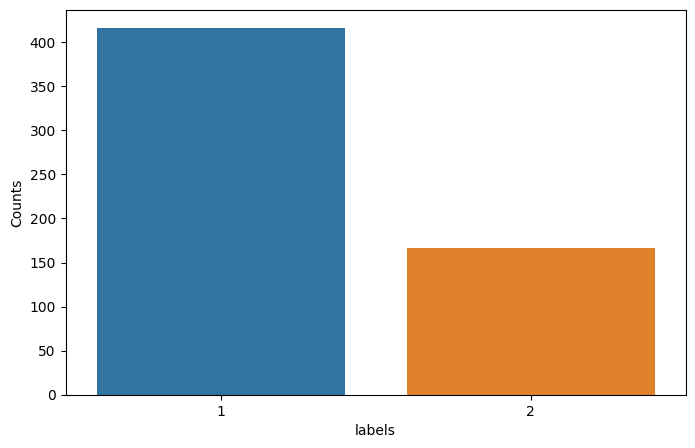

In [ ]:
## TODO: Check whether the dataset is balanced or not.

count_target0, count_target1 = df['label'].value_counts()
diff = np.abs(count_target1 - count_target0)

#threshold = 120 or 100

if diff < 120:
    print("ballanced: True")
else:
    print("ballanced: False")


target_val = df["label"].value_counts()

temp_df = pd.DataFrame({
    "labels": target_val.index,
    "Counts": target_val.values
})

plt.figure(figsize = (8,5))
sns.barplot(x = "labels", y = "Counts", data = temp_df)
plt.show()

#############As we can see, the 2 classes have different frequencies, so the dataset is imbalanced.############

Num of patients with liver disease: 416
Num of patients without liver disease: 167

-----------------------------------Plot-----------------------------------


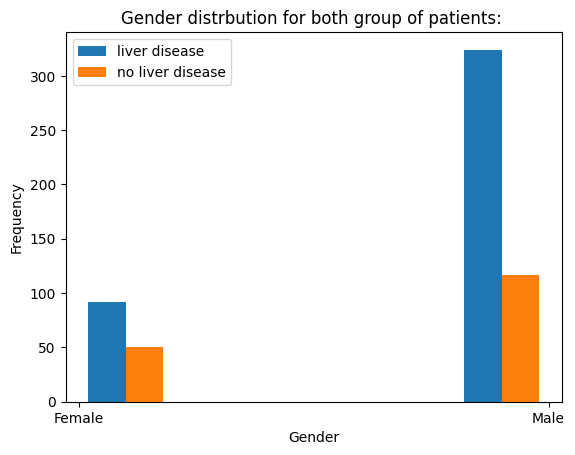

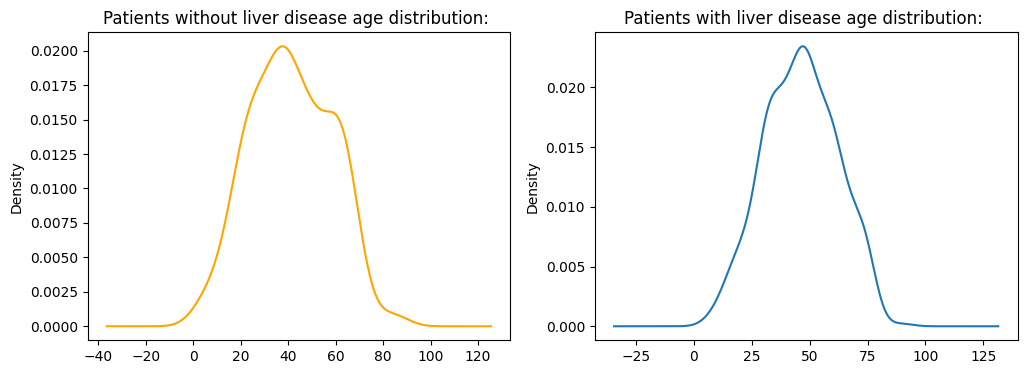

In [ ]:
## TODO: plot the age distirbution and gender distrbution for both group of patients.(4 plots)

#Label col. has '1' for liver disease and '2' for no liver disease

pos, neg = df["label"].value_counts()
print(f"Num of patients with liver disease: {pos}")
print(f"Num of patients without liver disease: {neg}")

##### gender distrbution #####

print('\n' +"-"*35 + 'Plot'+ '-'*35)
labels = ['liver disease', 'no liver disease']
plt.hist([df[df.label == 1]['Gender'], df[df.label == 2]['Gender']], bins = 5, label = labels)
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender distrbution for both group of patients: ')

##### age distrbution #####

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].set_title('Patients without liver disease age distribution: ')
df[df.label == 2]['Age'].plot.density(ax=axes[0], color = 'orange')

axes[1].set_title('Patients with liver disease age distribution: ')
df[df.label == 1]['Age'].plot.density(ax=axes[1])

plt.show()

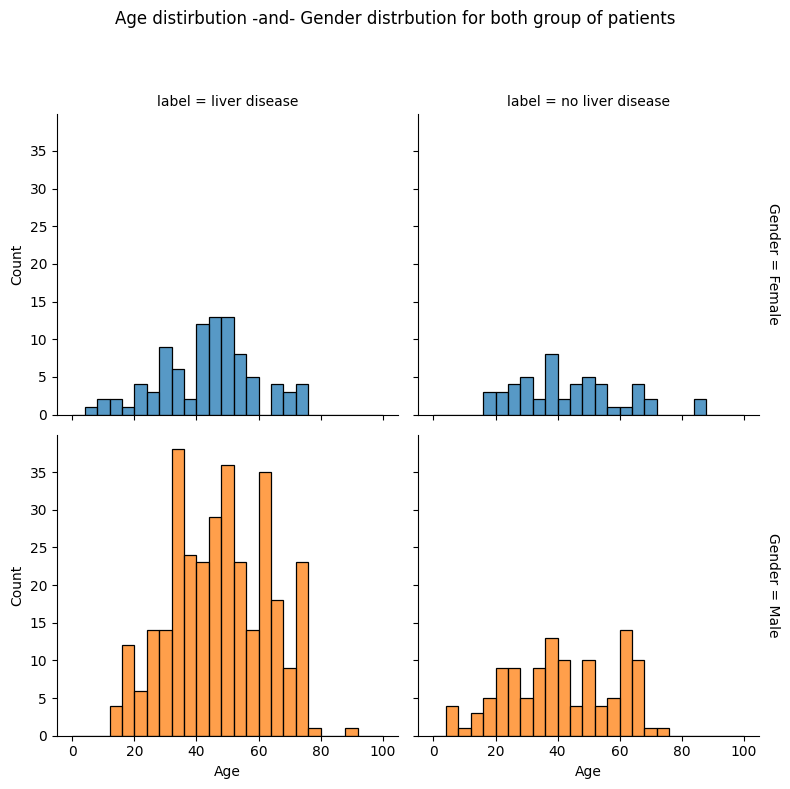

In [ ]:
df2 = df.copy()
labels = []
#Label col. has '1' for liver disease and '2' for no liver disease
for i in df2['label']:
  if i == 1:
    labels.append('liver disease')
  else:
    labels.append('no liver disease')

df2['label'] = labels

hist = sns.FacetGrid(df2, col = 'label', row = "Gender", margin_titles = True, hue="Gender", height = 4)
hist.map_dataframe(sns.histplot, x = "Age", binwidth=4, binrange=(0, 100))
plt.subplots_adjust(top = 0.85)
hist.fig.suptitle('Age distirbution -and- Gender distrbution for both group of patients');

##### Question: What do you conclude from the plots?




با توجه به پلات آخر که جنسیت و سن در آن به طور همزمان لحاظ شده مشخص است که این بیماری در میان مردان شایع تر است و در زنان کمتر میباشد. در میان زنان در سنین ۴۰ تا ۵۵ سال و در میان مردان از ۳۵ تا نزدیک ۸۰ سال میباشد.
با توجه به پلات دوم بیشتر کسانی که این بیماری را دارند در سن ۵۰ سالگی هستند

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529 

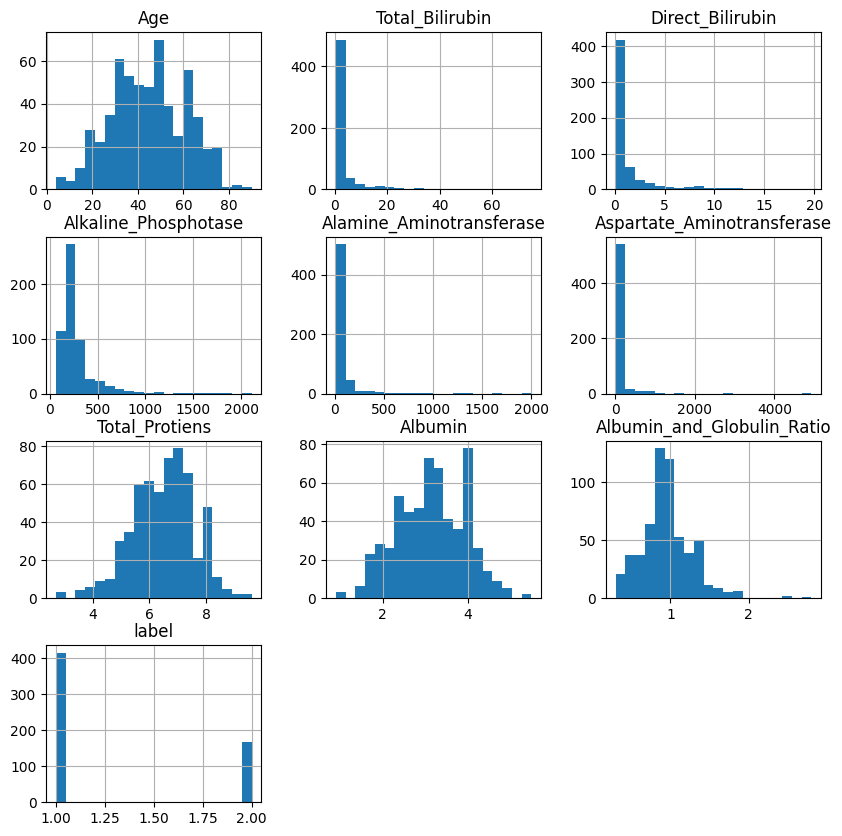

In [ ]:
################################################################################
## TODO
print(df.describe())
df.hist(figsize=(10, 10), bins=20)
plt.show()

<Axes: >

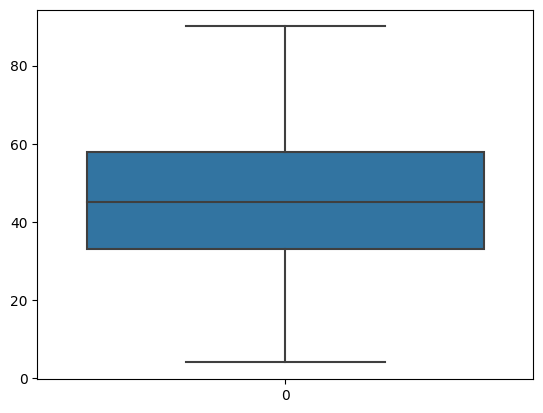

In [ ]:
cols = ['Age', 'Total_Bilirubin',	'Direct_Bilirubin',	'Alkaline_Phosphotase',	'Alamine_Aminotransferase',	'Aspartate_Aminotransferase',	'Total_Protiens',	'Albumin',	'Albumin_and_Globulin_Ratio']
sns.boxplot(df['Age'])  #ok

<Axes: >

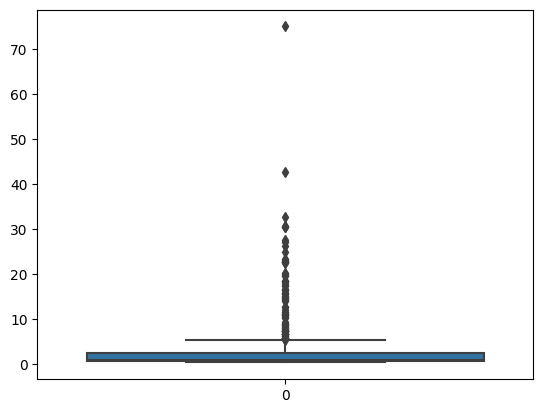

In [ ]:
sns.boxplot(df['Total_Bilirubin'])

In [ ]:
#threshold = 50
df = df[df.Total_Bilirubin <= 50 ]

<Axes: >

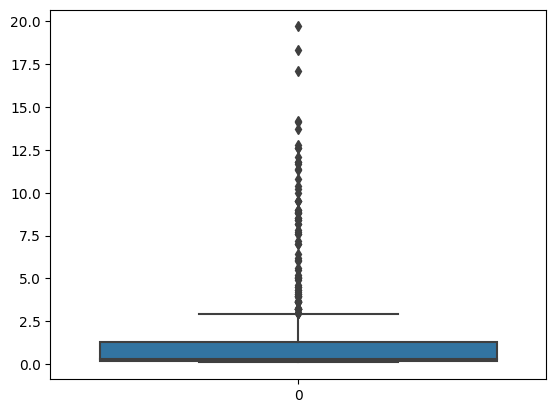

In [ ]:
sns.boxplot(df['Direct_Bilirubin'])

In [ ]:
#threshold = 16
df = df[df.Direct_Bilirubin <= 16 ]

<Axes: >

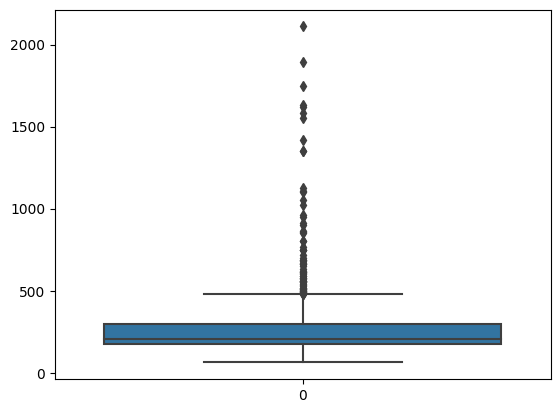

In [ ]:
sns.boxplot(df['Alkaline_Phosphotase']) #ok

<Axes: >

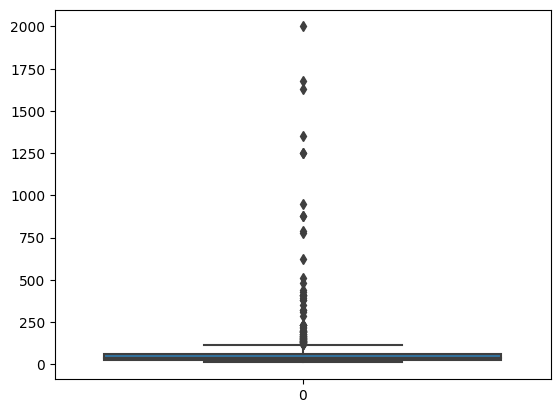

In [ ]:
sns.boxplot(df['Alamine_Aminotransferase'])

<Axes: >

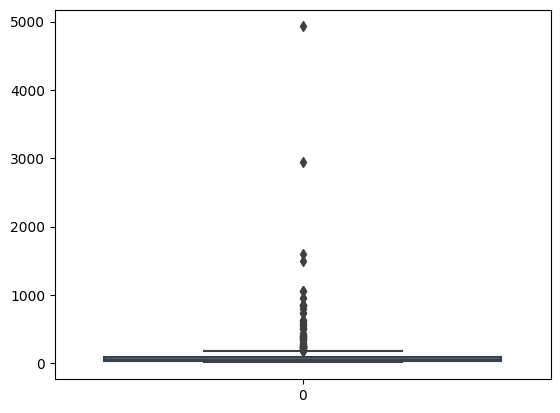

In [ ]:
sns.boxplot(df['Aspartate_Aminotransferase'])

In [ ]:
#threshold = 3000
df = df[df.Aspartate_Aminotransferase  <= 3000 ]

<Axes: >

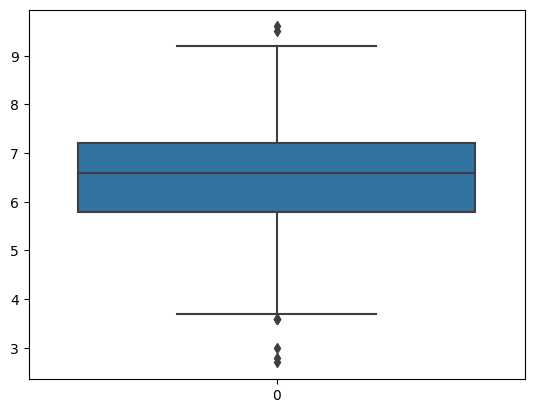

In [ ]:
sns.boxplot(df['Total_Protiens'])

<Axes: >

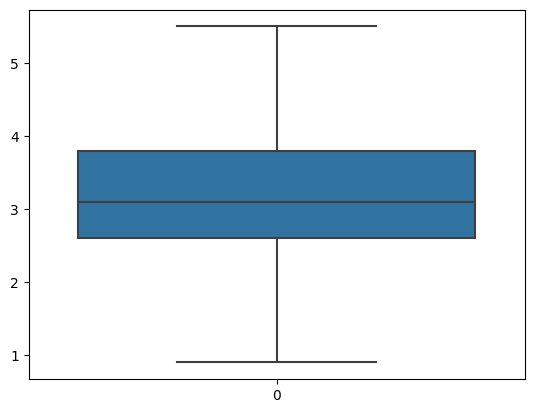

In [ ]:
sns.boxplot(df['Albumin'])

<Axes: >

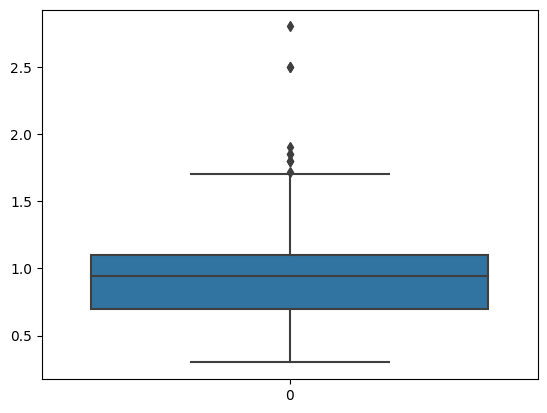

In [ ]:
sns.boxplot(df['Albumin_and_Globulin_Ratio'])

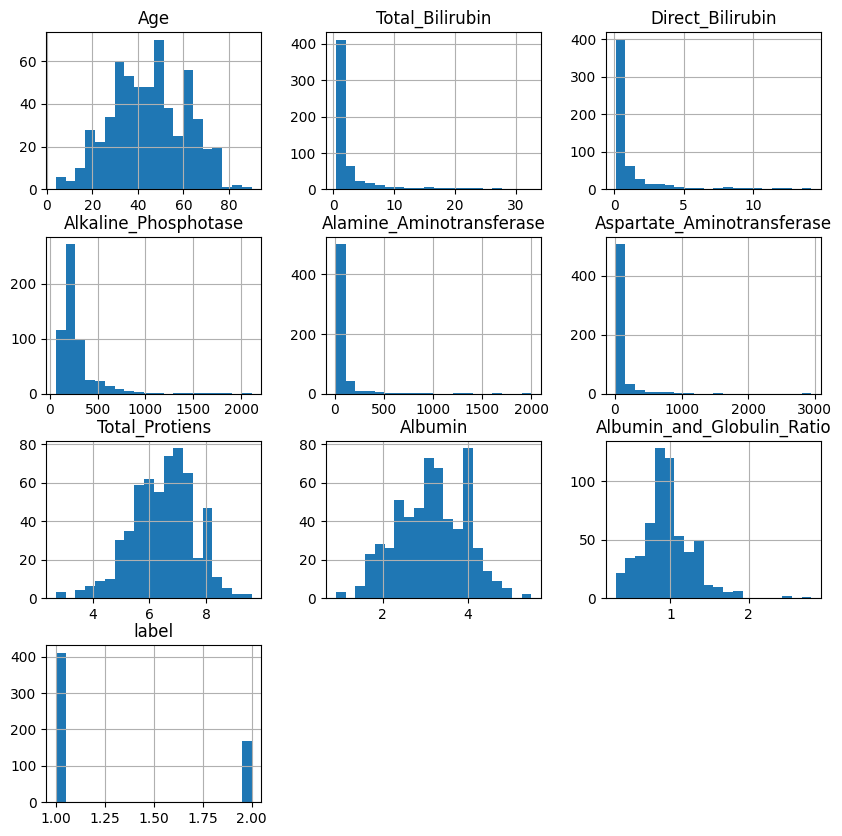

In [ ]:
df.hist(figsize=(10, 10), bins=20)
plt.show()

In [ ]:
################################################################################

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [ ]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
################################################################################

numerical_features =  ['Age', 'Total_Bilirubin',	'Direct_Bilirubin',	'Alkaline_Phosphotase',	'Alamine_Aminotransferase',	'Aspartate_Aminotransferase',	'Total_Protiens',	'Albumin',	'Albumin_and_Globulin_Ratio']
min, max = df[numerical_features].min(), df[numerical_features].max()
df[numerical_features] = ((df[numerical_features] - min) / (max - min))

#also feel free to do more feature engineering techniques if needed.

df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)
df['label'] = df['label'].apply(lambda x:1 if x == 1 else 0)

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.709302,0,0.009317,0.000000,0.060576,0.003015,0.002725,0.594203,0.521739,0.240,1
1,0.674419,1,0.326087,0.382979,0.310699,0.027136,0.030654,0.695652,0.500000,0.176,1
2,0.674419,1,0.214286,0.283688,0.208598,0.025126,0.019755,0.623188,0.521739,0.236,1
3,0.627907,1,0.018634,0.021277,0.058134,0.002010,0.003406,0.594203,0.543478,0.280,1
4,0.790698,1,0.108696,0.134752,0.064485,0.008543,0.016689,0.666667,0.326087,0.040,1


In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
label                         0
dtype: int64

In [ ]:
#cols = ['Albumin_and_Globulin_Ratio',
#'Total_Protiens',
#'Total_Bilirubin',
#'Direct_Bilirubin',
#'Alkaline_Phosphotase',
#'Alamine_Aminotransferase',
#'Aspartate_Aminotransferase']

#for i in cols:
      #mean_val = df[i].mean()
      #df[i].fillna(mean_val, inplace = True)

#df.isnull().sum()

### SVM

#### spliting data

In [ ]:
## TODO Split the data into test and training sets.
y = df.label
X = df.drop('label', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)

### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [ ]:
#TODO Train your model
my_model = SVC(kernel='linear')
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

In [ ]:
def report(y_true, y_pred):
  acc = np.sum((y_true == y_pred)) / len(y_pred)
  return acc

from sklearn.metrics import classification_report
print(f'My model report:\n{classification_report(y_test, y_pred)} \nand acc: {report(y_test, y_pred)}\n')

My model report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.72      1.00      0.84       147

    accuracy                           0.72       203
   macro avg       0.36      0.50      0.42       203
weighted avg       0.52      0.72      0.61       203
 
and acc: 0.7241379310344828



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [ ]:
#########################################################################################
## TODO
#########################################################################################

from sklearn.model_selection import GridSearchCV

params = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

svm_grid = GridSearchCV(
    estimator = SVC(),
    param_grid = params,
    cv = 5,
    n_jobs = 5,
    verbose = 3,
    scoring='accuracy'
)

svm_grid.fit(X_train, y_train)
print(svm_grid.best_params_)

#az code baadi estefade mikonam

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 1000, 'kernel': 'linear'}


In [ ]:
#########################################################################################
## TODO
#########################################################################################

from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
param_grid = dict (gamma = gamma_range, C = C_range)

grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)

print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_}')

The best parameters are {'C': 10000000.0, 'gamma': 0.001} with a score of 0.7173333333333334


Train an svm model on the entire training data using the parameters you found in the previous step.

In [ ]:
#########################################################################################
## TODO
#########################################################################################
new_model = SVC(kernel='rbf', C = 10000000.0, gamma = 0.001)
new_model.fit(X_train, y_train)
y_pred_new = new_model.predict(X_test)

print(f'My model report:\n{classification_report(y_test, y_pred_new)}')

My model report:
              precision    recall  f1-score   support

           0       0.49      0.45      0.47        56
           1       0.80      0.82      0.81       147

    accuracy                           0.72       203
   macro avg       0.64      0.63      0.64       203
weighted avg       0.71      0.72      0.71       203



### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

<Axes: >

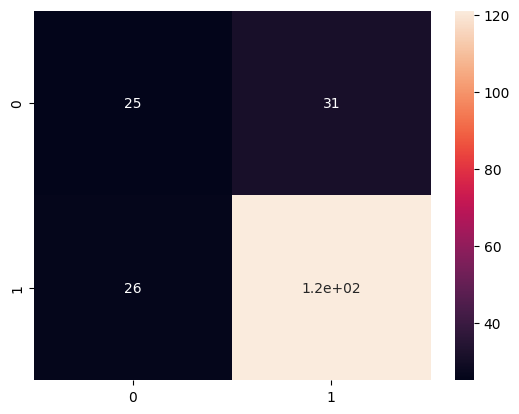

In [ ]:
#########################################################################################
## TODO
#########################################################################################
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_new),annot=True)

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class.

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [ ]:
#########################################################################################
## TODO
#########################################################################################
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'label'],
      dtype='object')

In [ ]:
mean = df['label'].mean()
std_dev = df['label'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'label'] += z_score * std_dev

In [ ]:
mean = df['Albumin_and_Globulin_Ratio'].mean()
std_dev = df['Albumin_and_Globulin_Ratio'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Albumin_and_Globulin_Ratio'] += z_score * std_dev

In [ ]:
mean = df['Age'].mean()
std_dev = df['Age'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Age'] += z_score * std_dev

In [ ]:
mean = df['Gender'].mean()
std_dev = df['Gender'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Gender'] += z_score * std_dev

In [ ]:
mean = df['Albumin'].mean()
std_dev = df['Albumin'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Albumin'] += z_score * std_dev

In [ ]:
mean = df['Total_Protiens'].mean()
std_dev = df['Total_Protiens'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Total_Protiens'] += z_score * std_dev

In [ ]:
mean = df['Total_Bilirubin'].mean()
std_dev = df['Total_Bilirubin'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Total_Bilirubin'] += z_score * std_dev

In [ ]:
mean = df['Direct_Bilirubin'].mean()
std_dev = df['Direct_Bilirubin'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Direct_Bilirubin'] += z_score * std_dev

In [ ]:
mean = df['Alkaline_Phosphotase'].mean()
std_dev = df['Alkaline_Phosphotase'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Alkaline_Phosphotase'] += z_score * std_dev

In [ ]:
mean = df['Alamine_Aminotransferase'].mean()
std_dev = df['Alamine_Aminotransferase'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Alamine_Aminotransferase'] += z_score * std_dev

In [ ]:
mean = df['Aspartate_Aminotransferase'].mean()
std_dev = df['Aspartate_Aminotransferase'].std()
for i in range(15):
    row_index = np.random.randint(len(df))
    z_score = np.random.uniform(3, 5)
    df.loc[row_index, 'Aspartate_Aminotransferase'] += z_score * std_dev

KeyError: ignored

In [ ]:
y = df.label
X = df.drop('label', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)

In [ ]:
######SVM########
my_model = SVC(kernel='linear')
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)
def report(y_true, y_pred):
  acc = np.sum((y_true == y_pred)) / len(y_pred)
  return acc

from sklearn.metrics import classification_report
print(f'My model report:\n{classification_report(y_test, y_pred)} \nand acc: {report(y_test, y_pred)}\n')

ValueError: ignored